# Analysis of Higher Dimensional (Spatial) Data

### Research question:

**On global scale earth surface temperatures are rising significantely. What about Potsdam, Germany?**

***

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12,6)

***

## Global Mean Temperatur Data

Source: [Berkeley Earth](http://berkeleyearth.org/data/)

In [3]:
## Load data from the net
#URL = "http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt"
#df_glob = pd.read_csv(URL, skiprows=33, delim_whitespace=True)

## Alternative: load from disk
DATA = "../data/Complete_TAVG_complete.txt"
df_glob = pd.read_csv(DATA, skiprows=33, delim_whitespace=True)
df_glob.head()

,%,"Year,","Month,","Anomaly,","Unc.,","Anomaly,.1","Unc.,.1","Anomaly,.2","Unc.,.2","Anomaly,.3","Unc.,.3","Anomaly,.4",Unc.
0,1750,1,0.018,3.352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,0.087,3.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.232,2.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.217,2.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-0.133,2.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_glob = df_glob.iloc[:,[0,1,2,3]]
df_glob.columns = ['year', 'month', 'anomaly', 'uncertainty']
df_glob.sample(10)

,year,month,anomaly,uncertainty
1018,1834,11,0.212,1.208
97,1758,2,-1.800,3.197
1968,1914,1,0.781,0.244
2527,1960,8,-0.095,0.083
2341,1945,2,-0.581,0.196
1676,1889,9,-0.574,0.346
2311,1942,8,-0.140,0.318
2318,1943,3,-0.214,0.179
1663,1888,8,-0.422,0.371
2018,1918,3,-0.509,0.186


In [5]:
df_glob.index = pd.to_datetime(df_glob['year'].astype(str) + '/' + df_glob['month'].astype(str), 
                               format="%Y/%m").dt.to_period('M')
df_glob.sample(10)

,year,month,anomaly,uncertainty
2010-03,2010,3,1.415,0.081
1807-03,1807,3,-0.573,3.135
1774-10,1774,10,-0.602,2.163
1785-03,1785,3,-2.956,3.382
1823-11,1823,11,-1.621,1.527
1804-01,1804,1,-0.247,3.415
1949-12,1949,12,-0.206,0.184
1844-10,1844,10,-0.646,0.657
1842-09,1842,9,-1.238,0.546
1801-12,1801,12,0.858,2.392


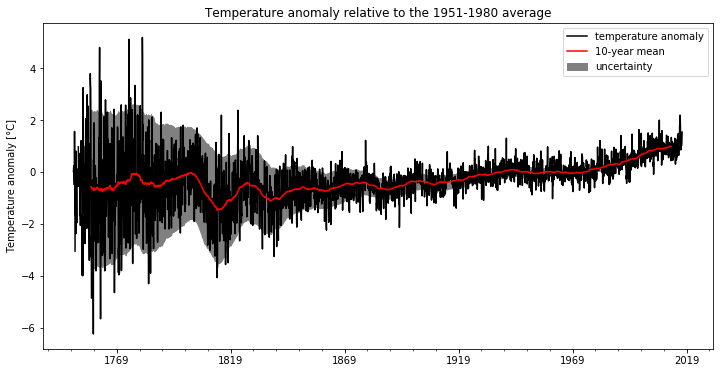

In [6]:
df_glob.anomaly.plot(color='k', label="temperature anomaly")
w=12*10 # 10-year window 
df_glob_anomaly = df_glob.anomaly.rolling(window=w, center=True).mean()
df_glob_anomaly.plot(color="r", label='10-year mean')
plt.fill_between(x=df_glob.index, 
                 y1=(df_glob.anomaly + df_glob.uncertainty).rolling(window=w, center=True).mean(),
                 y2=(df_glob.anomaly - df_glob.uncertainty).rolling(window=w, center=True).mean(),
                color="gray", label='uncertainty')
plt.ylabel('Temperature anomaly [°C]')
plt.title("Temperature anomaly relative to the 1951-1980 average")
plt.legend();

In [7]:
df_glob_anomaly = pd.DataFrame(df_glob_anomaly.dropna())
df_glob_anomaly.head(10)

,anomaly
1757-10,-0.571242
1757-11,-0.584125
1757-12,-0.591242
1758-01,-0.608925
1758-02,-0.616342
1758-03,-0.614983
1758-04,-0.647025
1758-05,-0.650242
1758-06,-0.662783
1758-07,-0.681775


***

## Gridded Data Set

Resources: [Overview of current atmospheric reanalyses](http://reanalyses.org/atmosphere/overview-current-atmospheric-reanalyses)

### ECMWF CERA-20C: 1901-2010

[What is CERA-20C](https://software.ecmwf.int/wiki/display/CKB/What+is+CERA-20C)

[Monthly Means of Daily Mean](https://www.ecmwf.int/en/research/climate-reanalysis/cera-20c)

Stream: Ensemble data assimilation monthly means of daily means  
Area: 73.5°N 27.0°W 33.0°N 45.0°E  
Type: Analysis  
Number: 0 to 9  
Version: 1  
Grid: 1.0° x 1.0°   
Type of level: Surface  
Parameter: 2 metre temperature  
Class: ERA-CLIM2 coupled reanalysis of the 20th-century (CERA-20C) 

### Load data set

In [8]:
FILENAME = "_grib2netcdf-atls06-95e2cf679cd58ee9b4db4dd119a05a8d-b0bnA_.nc"
ds_cera = xr.open_dataset('../data/'+FILENAME)

In [9]:
ds_cera

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, number: 10, time: 732)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, number, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-08-17 19:53:35 GMT by grib_to_netcdf-2.4.0: grib_to_ne...

In [10]:
df_cera = ds_cera.to_dataframe()
print(df_cera.shape)
df_cera.sample(20)

(22443120, 1)


,,,,t2m
latitude,longitude,number,time,
46.0,31.0,1,1977-11-01,284.293954
64.0,30.0,2,1950-01-01,255.334574
43.0,33.0,3,1979-09-01,293.562951
54.0,-4.0,5,1963-07-01,286.571958
63.0,-13.0,3,1989-03-01,276.996307
70.0,-16.0,8,1967-03-01,251.638901
43.0,19.0,8,1968-08-01,289.255185
66.0,9.0,8,1986-09-01,281.678872
68.0,-9.0,2,2002-01-01,271.727204


### Compute a single value for a specific meteorological parameter, by avagering all 10 ensemble members

In [11]:
ds_cera = ds_cera.mean(dim='number')
ds_cera

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, time: 732)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 241.5 242.8 244.2 246.0 ...

### Compute temperature in °C

In [12]:
print(ds_cera.t2m.shape)
ds_cera.t2m

(732, 42, 73)


<xarray.DataArray 't2m' (time: 732, latitude: 42, longitude: 73)>
array([[[ 241.460649,  242.761619, ...,  267.486367,  266.947045],
        [ 242.368687,  244.137305, ...,  268.528627,  268.04017 ],
        ..., 
        [ 289.380159,  289.386   , ...,  278.884666,  278.018975],
        [ 289.838072,  289.847807, ...,  279.657265,  279.896017]],

       [[ 239.065459,  240.630978, ...,  266.465159,  265.68173 ],
        [ 241.042041,  242.815162, ...,  267.299454,  266.578086],
        ..., 
        [ 289.306416,  289.258958, ...,  280.972472,  280.049466],
        [ 289.616721,  289.566951, ...,  282.363247,  282.767496]],

       ..., 
       [[ 243.550889,  244.578912, ...,  270.370136,  270.197947],
        [ 243.571576,  244.736863, ...,  271.181432,  270.98527 ],
        ..., 
        [ 293.303511,  293.250699, ...,  292.041117,  291.903001],
        [ 293.779191,  293.72796 , ...,  292.550869,  293.326875]],

       [[ 246.952807,  248.054573, ...,  269.16457 ,  268.844287],
  

In [13]:
ds_cera['t2m'] = ds_cera.t2m - 273.15
ds_cera

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, time: 732)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 -31.69 -30.39 -28.94 ...

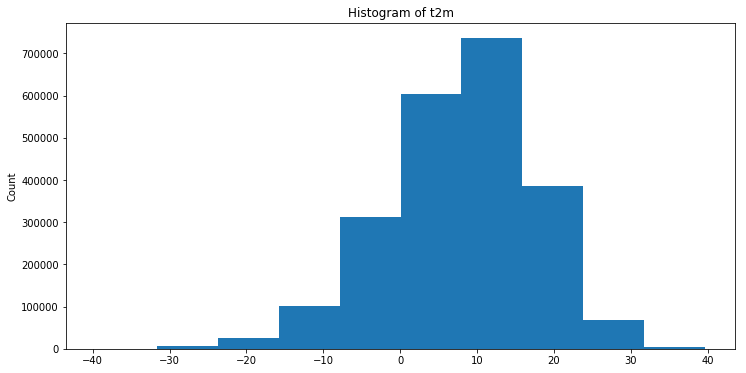

In [14]:
ds_cera.t2m.plot();

C:\Users\josi\Miniconda3\envs\swc\lib\site-packages\xarray\plot\utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


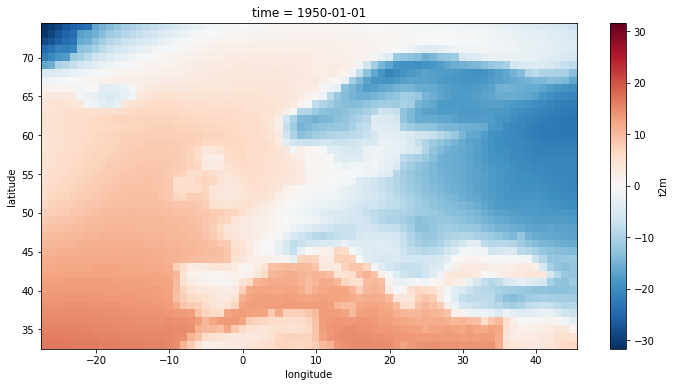

In [15]:
ds_cera.t2m[0].plot();

#### Nicer plotting using cartopy

_Feel free to experiment with different map projections provided by the cartopy library (see [here](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) for a list of featured projections)_

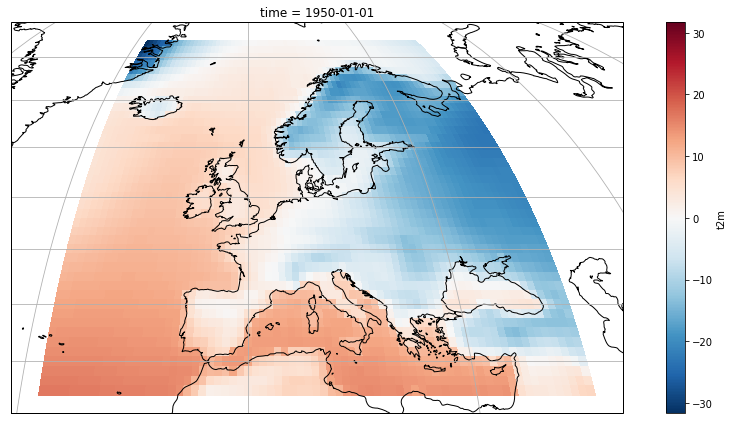

In [16]:
def cuteplot(ds, var, idx=0): 
    '''
    Function to plot xarray data set on different map projections
    '''
    ax = plt.axes(projection=ccrs.Mollweide())    
    ds[var][idx].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                x='longitude', y='latitude', add_colorbar=True)
    ax.coastlines(resolution='50m')
    ax.gridlines()
    plt.tight_layout();
    
cuteplot(ds_cera, 't2m', idx=0)

### Compute average for the period 1951-1980

In [17]:
ds_cera_reference_period = ds_cera.sel(time=slice('1951', '1980'))
ds_cera_reference_period

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, time: 360)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * time       (time) datetime64[ns] 1951-01-01 1951-02-01 1951-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 -36.42 -35.07 -33.68 ...

In [18]:
ds_cera_reference_period_mean = ds_cera_reference_period.mean(dim='time')
ds_cera_reference_period_mean

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
Data variables:
    t2m        (latitude, longitude) float64 -22.63 -21.36 -20.15 -18.86 ...

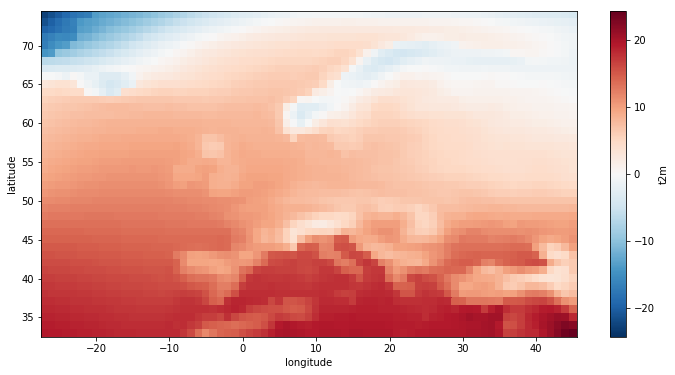

In [19]:
ds_cera_reference_period_mean.t2m.plot();

### Compute temperature anomaly for 10 year rolling window

In [20]:
ds_cera_anomaly = ds_cera.copy()
ds_cera_anomaly['t2m'] = ds_cera.t2m - ds_cera_reference_period_mean.t2m

In [21]:
w # 10 years on monthly scale

120

In [22]:
ds_cera_anomaly_10y = ds_cera_anomaly.rolling(time=w, center=True).mean()
ds_cera_anomaly_10y 

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, time: 732)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan nan nan nan ...

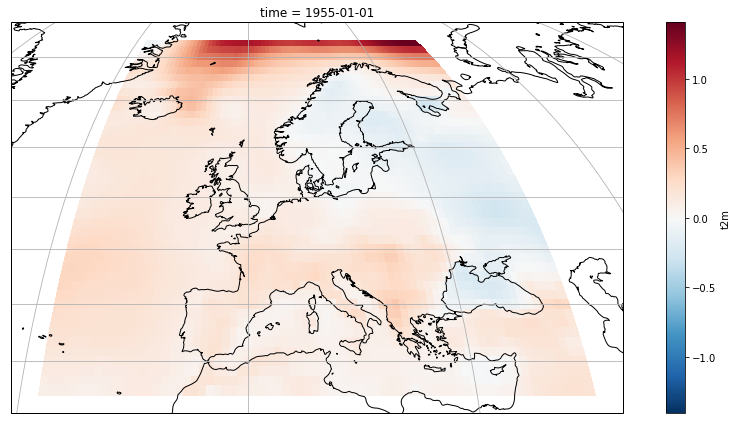

In [23]:
#df_cera_anomaly_10y.t2m[60].plot();
cuteplot(ds_cera_anomaly_10y,'t2m',idx=60)

### Find coordinates of Telegrafenberg, Potsdam

In [24]:
import geopandas as gpd

In [25]:
pik = gpd.tools.geocode('Telegrafenberg 14473 Potsdam')
pik

,address,geometry
0,"Telegrafenberg, 14473 Potsdam, Germany",POINT (13.0639263 52.3810497)


In [26]:
X = pik.geometry.x.values[0]
Y = pik.geometry.y.values[0]
print(X,Y)

13.0639263 52.3810497


#### Sanity check of coordinates

In [27]:
import folium

In [28]:
m = folium.Map(location=[Y, X], zoom_start=5, min_zoom=2)
folium.Marker([Y, X], popup='GFZ').add_to(m)
folium.TileLayer('stamentoner', min_zoom=2).add_to(m)
folium.LayerControl().add_to(m)
m

### Use PIK coordinates to extract data from CERA dataset

In [29]:
ds_cera_anomaly_10y

<xarray.Dataset>
Dimensions:    (latitude: 42, longitude: 73, time: 732)
Coordinates:
  * longitude  (longitude) float32 -27.0 -26.0 -25.0 -24.0 -23.0 -22.0 -21.0 ...
  * latitude   (latitude) float32 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan nan nan nan ...

In [30]:
print(X,Y)

13.0639263 52.3810497


In [31]:
pik_anomaly = ds_cera_anomaly_10y.sel(latitude=[Y], longitude=[X], method='Nearest')
pik_anomaly

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 732)
Coordinates:
  * longitude  (longitude) float32 13.0
  * latitude   (latitude) float32 52.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 1950-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan nan nan nan ...

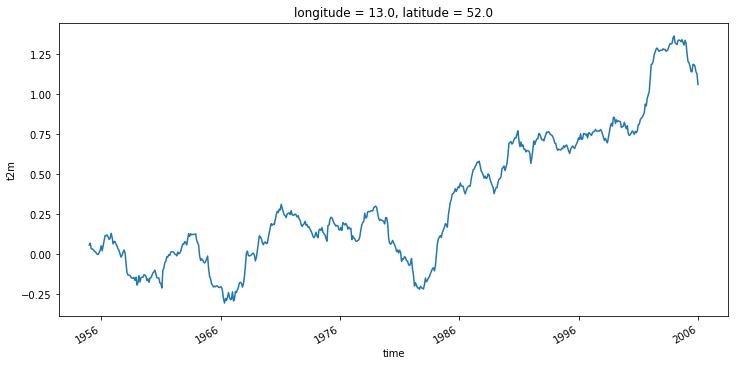

In [32]:
pik_anomaly.t2m.plot();

### Continue with pandas ...

In [33]:
df_pik_anomaly = pik_anomaly.to_dataframe()
df_pik_anomaly.head(10)

t2m
latitude longitude time           
52.0     13.0      1950-01-01  NaN
                   1950-02-01  NaN
                   1950-03-01  NaN
                   1950-04-01  NaN
                   1950-05-01  NaN
                   1950-06-01  NaN
                   1950-07-01  NaN
                   1950-08-01  NaN
                   1950-09-01  NaN
                   1950-10-01  NaN

In [34]:
# Clean up
df_pik_anomaly = (df_pik_anomaly.reset_index().
                  drop(['longitude', 'latitude'], axis=1).
                  set_index('time').dropna())
df_pik_anomaly.index = df_pik_anomaly.index.to_period('M')
df_pik_anomaly.sample(10)

,t2m
time,
1989-03,0.416279
1998-06,0.695406
1958-04,-0.130024
1959-11,-0.164290
1955-12,0.025582
1997-05,0.767626
1968-06,-0.010880
1993-04,0.746669
1988-04,0.472549


## Combine data sets

**Recall**  
* Global temperatur anomaly data set: `df_glob_anomaly`   
* Potsdam temperatur anomaly data set: `df_pik_anomaly`

### Merge data on index

In [35]:
df_glob_anomaly.index

PeriodIndex(['1757-10', '1757-11', '1757-12', '1758-01', '1758-02', '1758-03',
             '1758-04', '1758-05', '1758-06', '1758-07',
             ...
             '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
             '2011-11', '2011-12', '2012-01', '2012-02'],
            dtype='period[M]', length=3053, freq='M')

In [36]:
df_pik_anomaly.index

PeriodIndex(['1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
             '1955-07', '1955-08', '1955-09', '1955-10',
             ...
             '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09',
             '2005-10', '2005-11', '2005-12', '2006-01'],
            dtype='period[M]', name='time', length=613, freq='M')

In [37]:
df_pik_anomaly['glob_anomaly'] = df_glob_anomaly
df_pik_anomaly.head()

,t2m,glob_anomaly
time,,
1955-01,0.057636,-0.041700
1955-02,0.068357,-0.035717
1955-03,0.033931,-0.026525
1955-04,0.033343,-0.034275
1955-05,0.029448,-0.034333


### Final Plot

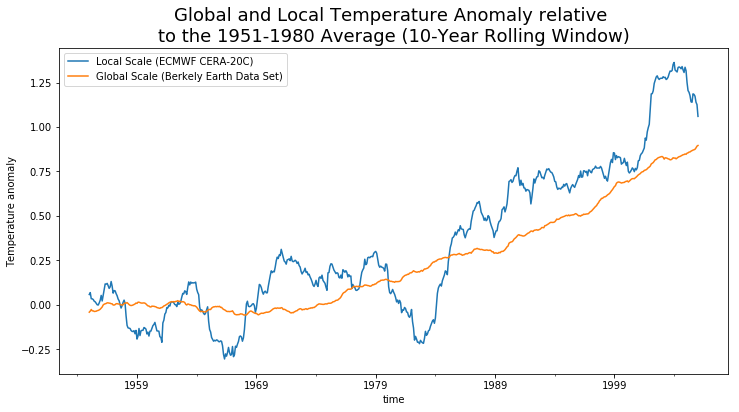

In [38]:
fig, ax = plt.subplots()
df_pik_anomaly.plot(ax=ax)
ax.set_ylabel('Temperature anomaly')
ax.set_title('Global and Local Temperature Anomaly relative \nto the 1951-1980 Average (10-Year Rolling Window)', 
          size=18)
ax.legend(['Local Scale (ECMWF CERA-20C)',
            'Global Scale (Berkely Earth Data Set)']);

***
**Conclusion:** The analysis of the gridded data set ECMWF CERA-20C, indicates that the earth surface temperature rise at Potsdam, Germany is in accordance with the global trend. 